# Prototyping

## In-Depth Analysis

In [10]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
foodDf = pd.read_csv("Food_Production.csv")
print (foodDf.shape)

foodDf.head()

(43, 23)


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [7]:
avgLandUse = foodDf["Land use change"].mean()
print(avgLandUse)

1.26046511627907


This gives use the average land use change, which is the Kilogram CO2 equivalents per Kg of product produced. 

Now let's move on to ordering the food product to see which gives us the most and least CO2 per Kg of product

Text(0.5, 0, 'Kg CO2 per Kg of product w/ line at Avg')

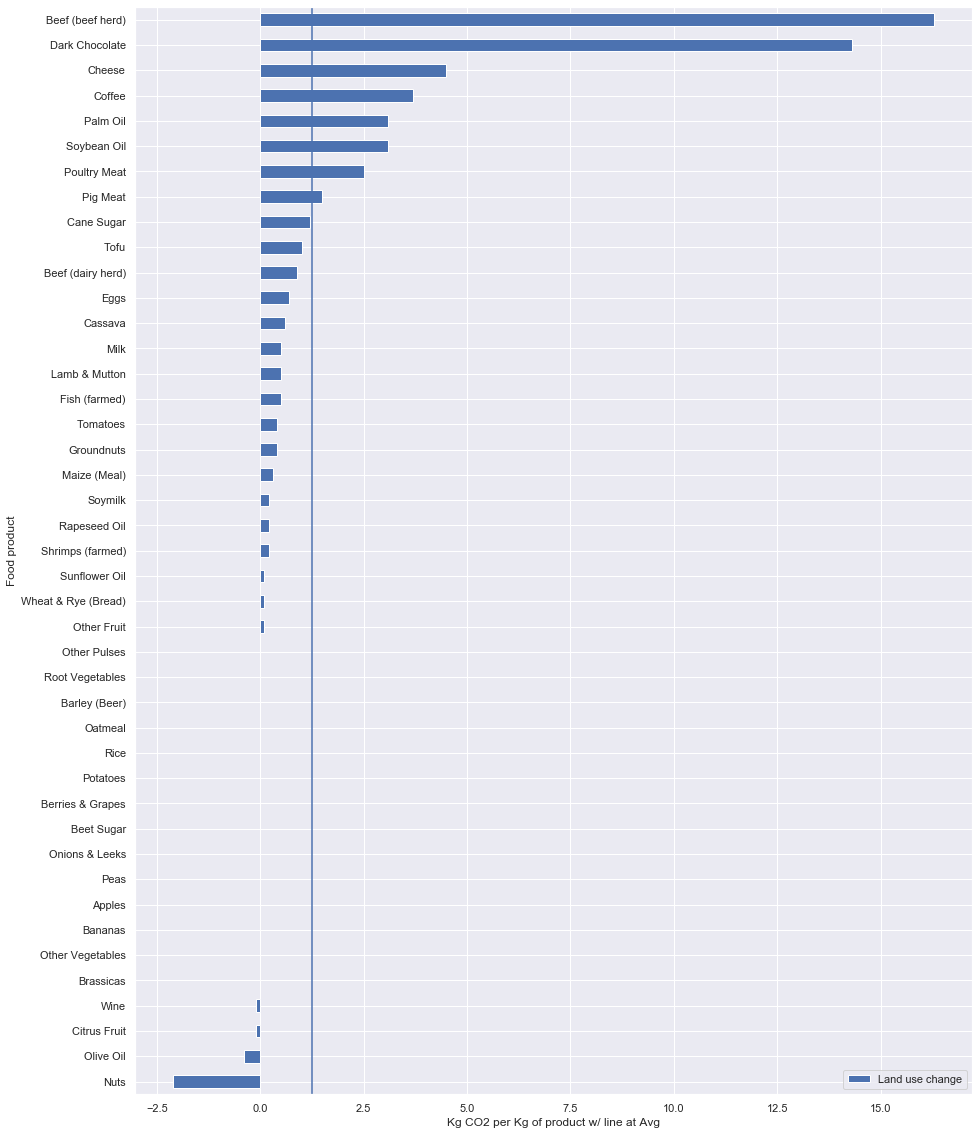

In [68]:
descendingLUC_DF = foodDf.sort_values(by = 'Land use change', ascending = True).iloc[:,:2] #do 2

fig, ax = plt.subplots(figsize=(15,20))
plt.axvline(1.26046511627907,0)
sns.set()
descendingLUC_DF.set_index('Food product').plot(kind='barh', stacked = True, ax = ax)
plt.xlabel('Kg CO2 per Kg of product w/ line at Avg')

With this, we see that there are only 8 grown items that are above this average of 1.26046511627907, 3 of these being meats (37.5%)

Now to find the average of the Total emissions of these items and compare

In [39]:
avgTotEmiss = foodDf["Total_emissions"].mean()
print(avgTotEmiss)

5.9720930232558125


Text(0.5, 0, 'Total emissions & category w/ line at Avg')

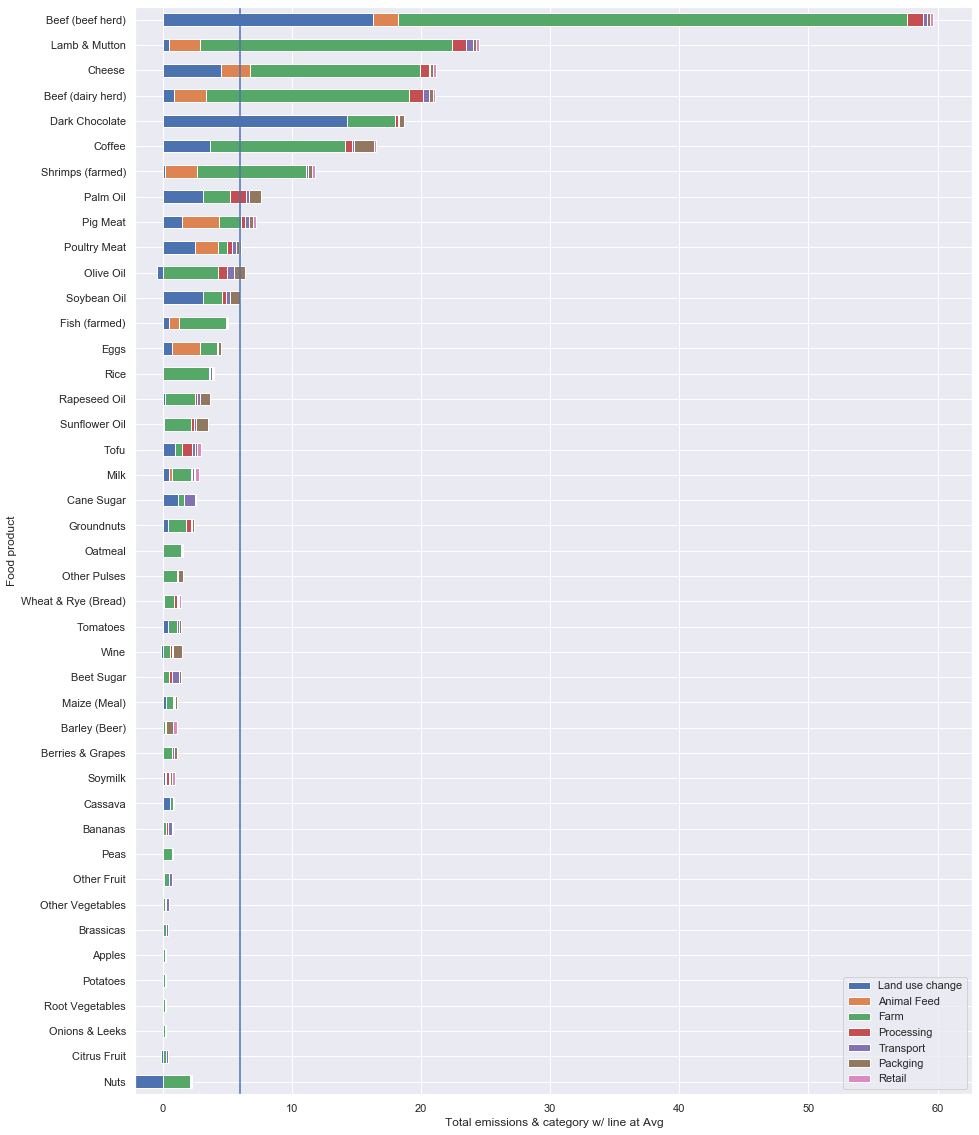

In [51]:
descendingEmiss_DF = foodDf.sort_values(by = 'Total_emissions', ascending = True).iloc[:,:8]

fig, ax = plt.subplots(figsize=(15,20))
plt.axvline(5.9720930232558125,0)
sns.set()
descendingEmiss_DF.set_index('Food product').plot(kind='barh', stacked = True, ax = ax)
plt.xlabel('Total emissions & category w/ line at Avg')

After reviewing all of the emissions, 12 are above the average.
This time there are 6 types of meat, which is 50%

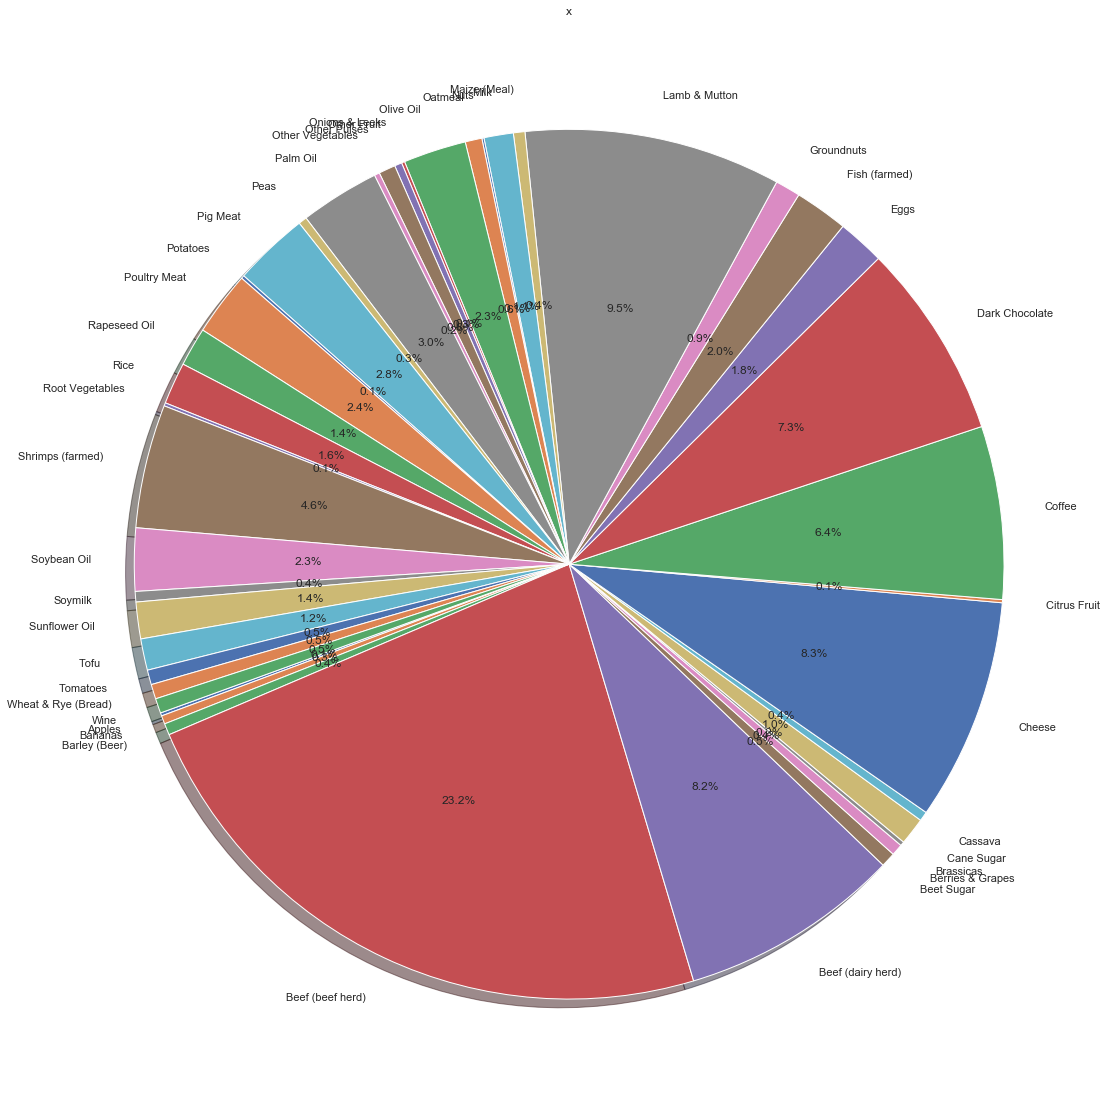

In [69]:
#pie chart
plt.figure(figsize = (20,20))
pieDf = foodDf.groupby('Food product')['Total_emissions'].sum()
labels = (np.array(pieDf.index))
sizes = (np.array((pieDf / pieDf.sum())*100))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 200, shadow = True)
plt.title('x')
plt.show()